In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import recall_score,auc, roc_auc_score, roc_curve,confusion_matrix,classification_report
from sklearn.model_selection import ShuffleSplit,learning_curve,GridSearchCV,RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
credit_df=pd.read_csv('/Users/chinararora/Documents/Semester_2@UTD/ML/Assignment/Assignment-2/creditcard.csv')
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [9]:
#There are no missing values.
credit_df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

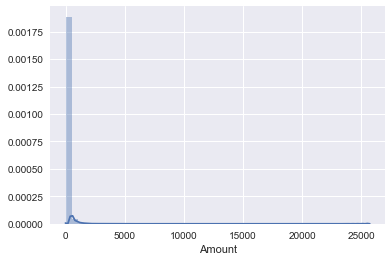

In [16]:
sns.distplot(credit_df['Amount'],hist=True,kde=True)

Text(0.5,1,'Histogram of distribution of Amount')

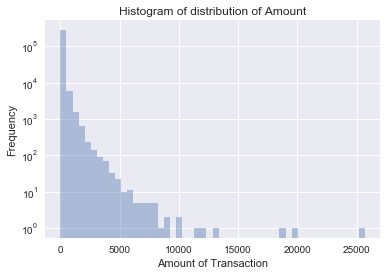

In [24]:
#Taking log-normal of 'Amount'to conform distribution to normality
#It can be observed that there are some transactions for which amount is extraordinarily high. These could be the fraudulent transactions.
#We will not remove these transactions assuming them to be outliers as they could be potential cases of fraud.
#So, outlier removal is not performed for this dataset.
import matplotlib.pyplot as plt
plt.yscale('log')
ax=sns.distplot(credit_df['Amount'],kde=False)
ax.set_xlabel('Amount of Transaction')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of distribution of Amount')

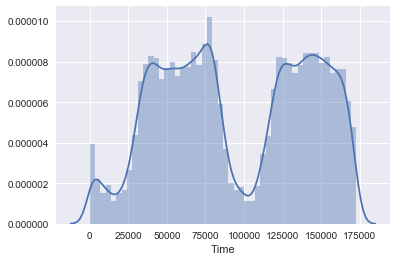

In [23]:
#We get a bimodal graph. The time variable gives the time elapsed between this transaction and 1st transaction in dataset 
sns.distplot(credit_df['Time'],hist=True,kde=True)

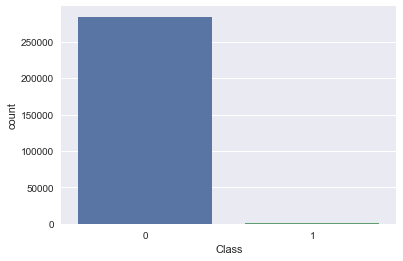

In [6]:
#It can be observed that the credit card-data is highly imbalanced
import seaborn as sns
sns.set()
sns.countplot(x='Class',data=credit_df)

In [11]:
#There are only about 0.172% of fraudulent transactions. We need to make pur data balanced.
credit_df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [4]:
#Feature Scaling for features Amount and Time.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
credit_df[['Time','Amount']]=scaler.fit_transform(credit_df[['Time','Amount']])
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,-1.996583,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.996562,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-1.996562,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.996541,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [32]:
#It can be pbserved that features V17,V14,V12,V10,V7 are negatively correlated with the Class variable. 
#Increasing/Decreasing these values tends to change the value of Class variable 
#plt.subplots(figsize=(10,10))
#sns.heatmap(credit_df.corr())

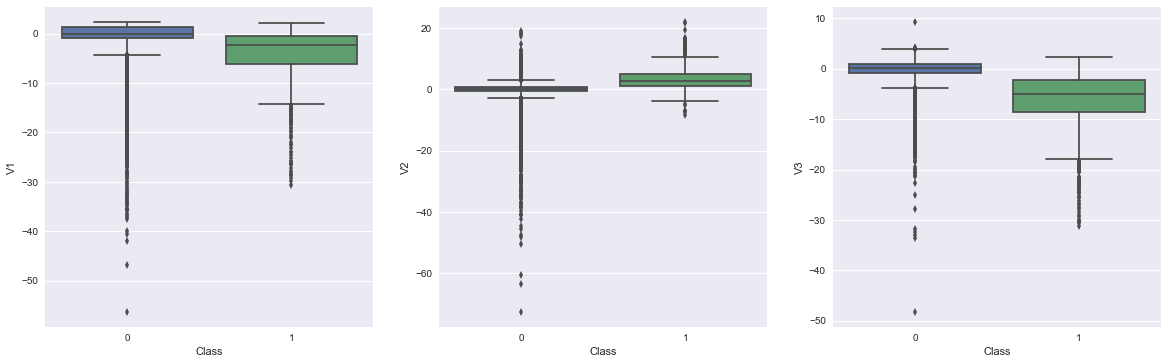

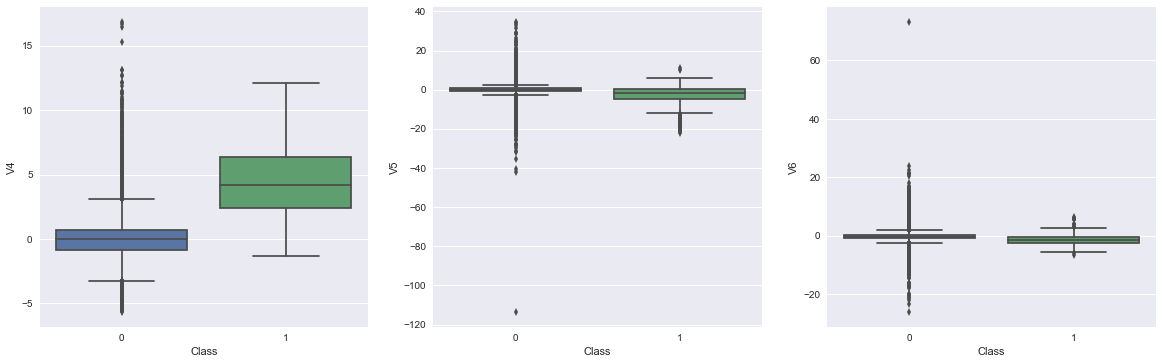

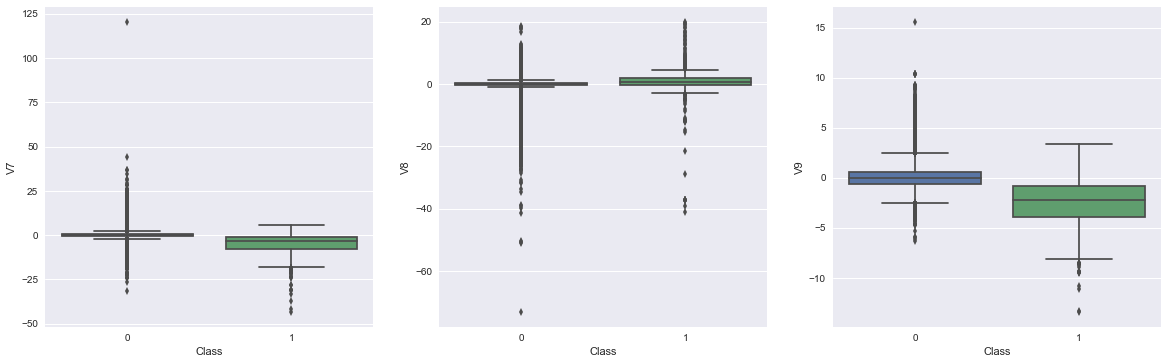

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='Class',y='V1',data=credit_df)
plt.subplot(3,3,2)
sns.boxplot(x='Class',y='V2',data=credit_df)
plt.subplot(3,3,3)
sns.boxplot(x='Class',y='V3',data=credit_df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(3,3,4)
sns.boxplot(x='Class',y='V4',data=credit_df)
plt.subplot(3,3,5)
sns.boxplot(x='Class',y='V5',data=credit_df)
plt.subplot(3,3,6)
sns.boxplot(x='Class',y='V6',data=credit_df)
plt.show()
plt.figure(figsize=(20,20))
plt.subplot(3,3,7)
sns.boxplot(x='Class',y='V7',data=credit_df)
plt.subplot(3,3,8)
sns.boxplot(x='Class',y='V8',data=credit_df)
plt.subplot(3,3,9)
sns.boxplot(x='Class',y='V9',data=credit_df)
plt.show()

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(credit_df.iloc[:,0:30],credit_df.iloc[:,30:],test_size=0.2,random_state=42)

In [10]:
from imblearn.over_sampling import SMOTE
print('Before Oversampling count of non-fraudulent transactions',sum(y_train['Class']==0))
print('Before Oversampling count of fraudulent transactions',sum(y_train['Class']==1))

sm=SMOTE(random_state=12)
x_train_bal,y_train_bal=sm.fit_sample(x_train,y_train.values.ravel())

print('After Oversampling count of non-fraudulent transactions',sum(y_train_bal==0))
print('After Oversampling count of fraudulent transactions',sum(y_train_bal==1))

Before Oversampling count of non-fraudulent transactions 227451
Before Oversampling count of fraudulent transactions 394
After Oversampling count of non-fraudulent transactions 227451
After Oversampling count of fraudulent transactions 227451


In [57]:
from sklearn.ensemble import ExtraTreesClassifier
#To suppres exponenetial form of decimal values
np.set_printoptions(suppress=True)
model = ExtraTreesClassifier()
model.fit(x_train_bal,y_train_bal)
print(model.feature_importances_)

[0.011325   0.00959983 0.00907111 0.08823378 0.03951037 0.00713677
 0.00658114 0.01098541 0.00770837 0.04790629 0.10291528 0.13566992
 0.09900014 0.00819588 0.0601662  0.01021606 0.10236222 0.1041364
 0.0522372  0.01983922 0.00703539 0.0084908  0.00819686 0.00393171
 0.00930892 0.00497811 0.01021072 0.00388897 0.00316086 0.00800109]


In [59]:
arr=np.sort(model.feature_importances_,axis=None)
feature_index_arr=model.feature_importances_.argsort()[-15:][::-1]
feature_index_arr

array([11, 17, 10, 16, 12,  3, 14, 18,  9,  4, 19,  0,  7, 15, 26])

In [44]:
#Support Vector Machines
#Linear Kernels
from sklearn import svm
model1=svm.LinearSVC(C=1.0,
                     class_weight='balanced',
                     loss='squared_hinge',
                     max_iter=1000,
                     penalty='l2',
                     random_state=0)

In [61]:
model1.fit(x_train_bal,y_train_bal)
y_pred=model1.predict(x_test)

In [64]:
recall_score(y_test,y_pred)

0.9183673469387755

In [11]:
def roc_auc(yTest,y_pred):
    sns.set()
    fpr, tpr, thresholds = roc_curve(yTest, y_pred)
    roc_auc = auc(fpr,tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [12]:
def plot_confusion_matrix(yTest,y_pred):
    cm=confusion_matrix(yTest,y_pred)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title = 'Recall Score: {0}'.format(recall_score(yTest,y_pred))
    plt.title(all_sample_title, size = 15);
    print(classification_report(yTest,y_pred))

In [13]:
def plot_learning_curve(model,name='Learning Curve'):
    sns.set()
    cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
    train_sizes=np.linspace(.1, 1.0, 5)
    trainSize, trainScores, testScores = learning_curve(model,x_train_bal,y_train_bal, cv=cv, 
                                                        n_jobs=2,train_sizes=train_sizes)
    train_scores_mean = np.mean(trainScores, axis=1)
    train_scores_std = np.std(trainScores, axis=1)
    test_scores_mean = np.mean(testScores, axis=1)
    test_scores_std = np.std(testScores, axis=1)
    plt.plot(trainSize, train_scores_mean, 'b-',label="Training score")
    plt.plot(trainSize, test_scores_mean, 'r-',label="Cross-validation score")
    plt.title(name)
    plt.xlabel('Training size ')
    plt.ylabel('Score')
    plt.grid(True)
    plt.legend(loc="best")
    plt.show()

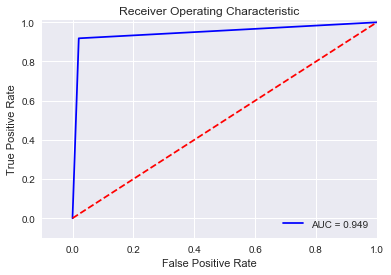

In [83]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.54      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



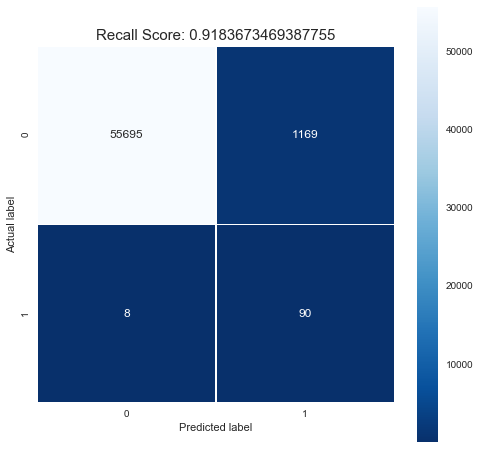

In [89]:
plot_confusion_matrix(y_test,y_pred)

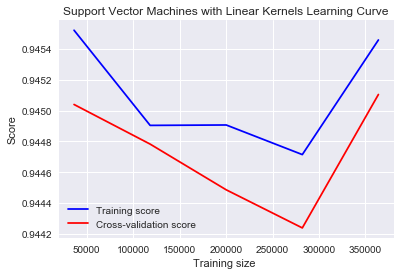

In [112]:
plot_learning_curve(model1,'Support Vector Machines with Linear Kernels Learning Curve')

In [113]:
#RBF Kernels
rbf_clf=svm.SVC(kernel='rbf',C=1.0,random_state=0)
rbf_clf.fit(x_train_bal,y_train_bal)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=0,
  shrinking=True, tol=0.001, verbose=False)

In [114]:
y_pred=rbf_clf.predict(x_test)
recall_score(y_test,y_pred)

0.7551020408163265

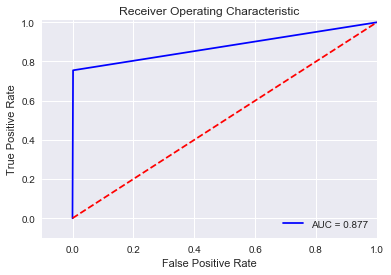

In [115]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.42      0.76      0.54        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.71      0.88      0.77     56962
weighted avg       1.00      1.00      1.00     56962



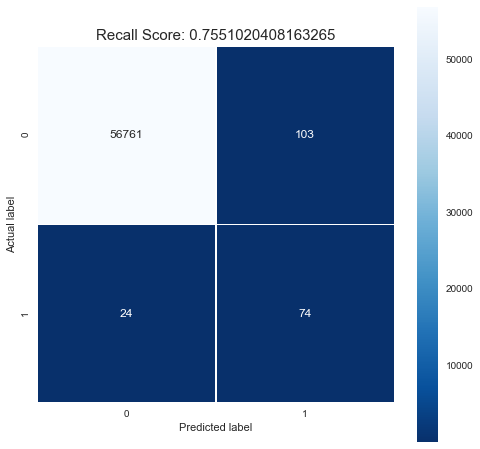

In [116]:
plot_confusion_matrix(y_test,y_pred)

In [118]:
#Takes long time to run(Has been running for 1.5 hours now.)
#plot_learning_curve(rbf_clf,'Support Vector Machines with Radial Basis Function Kernel Learning Curve')

In [14]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion = "gini", 
                                    splitter = 'random', 
                                    max_leaf_nodes = 10, 
                                    min_samples_leaf = 10, 
                                    max_depth= 2)
dtree.fit(x_train_bal,y_train_bal)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [15]:
y_pred=dtree.predict(x_test)
recall_score(y_test,y_pred)

0.8673469387755102

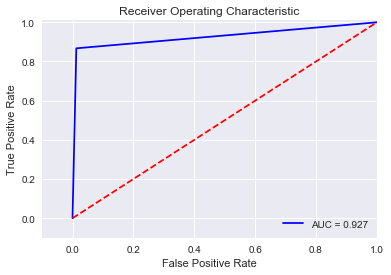

In [16]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.87      0.19        98

   micro avg       0.99      0.99      0.99     56962
   macro avg       0.55      0.93      0.59     56962
weighted avg       1.00      0.99      0.99     56962



/Users/chinararora/anaconda3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)
/Users/chinararora/anaconda3/lib/python3.6/site-packages/numpy/lib/type_check.py:546: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  'a.item() instead', DeprecationWarning, stacklevel=1)


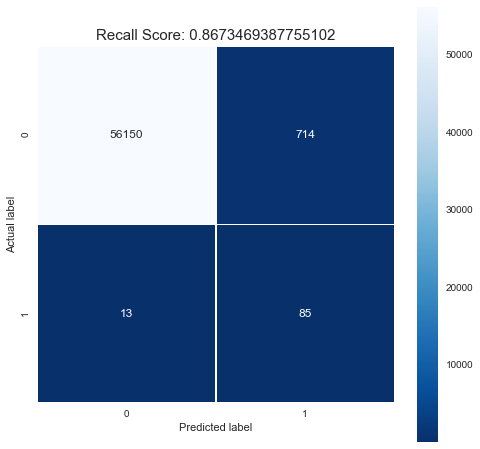

In [17]:
plot_confusion_matrix(y_test,y_pred)

/Users/chinararora/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/Users/chinararora/anaconda3/lib/python3.6/site-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


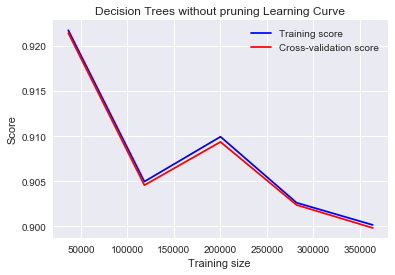

In [18]:
plot_learning_curve(dtree,'Decision Trees without pruning Learning Curve')

In [21]:
#Experimenting with max_leaf_nodes,min_samples_leaf,max_depth parameters for pruning
parameters={'min_samples_leaf':[30,100,300],'max_depth':[3,5,10],'max_leaf_nodes':[5,10,15]}
dt=DecisionTreeClassifier()
clf=GridSearchCV(dt,parameters,cv=5,verbose=5,n_jobs=3)
clf.fit(x_train_bal,y_train_bal)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   24.4s
[Parallel(n_jobs=3)]: Done  66 tasks      | elapsed:  2.6min
[Parallel(n_jobs=3)]: Done 135 out of 135 | elapsed:  5.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=3,
       param_grid={'min_samples_leaf': [30, 100, 300], 'max_depth': [3, 5, 10], 'max_leaf_nodes': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=5)

In [22]:
clf.best_params_

{'max_depth': 5, 'max_leaf_nodes': 15, 'min_samples_leaf': 30}

In [23]:
dt_gridcv=clf.best_estimator_
dt_gridcv.fit(x_train_bal,y_train_bal)
y_pred=dt_gridcv.predict(x_test)

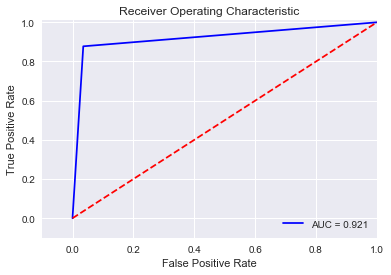

In [24]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.88      0.08        98

   micro avg       0.96      0.96      0.96     56962
   macro avg       0.52      0.92      0.53     56962
weighted avg       1.00      0.96      0.98     56962



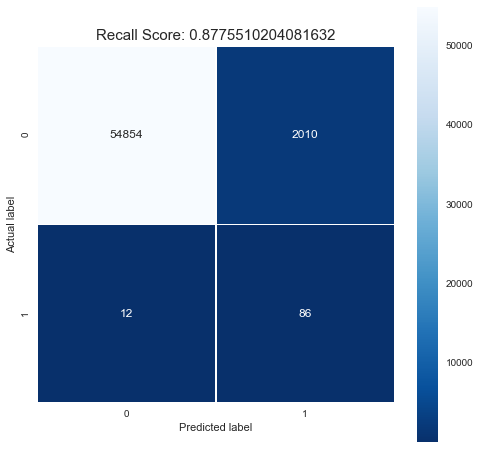

In [25]:
plot_confusion_matrix(y_test,y_pred)

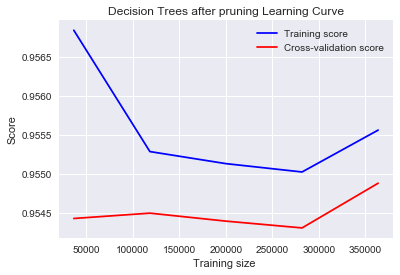

In [26]:
plot_learning_curve(dt_gridcv,'Decision Trees after pruning Learning Curve')

In [27]:
import lightgbm as lgb
lgbm_clf=lgb.LGBMClassifier(max_depth=2)
lgbm_clf.fit(x_train_bal,y_train_bal)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=2,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [28]:
y_pred=lgbm_clf.predict(x_test)

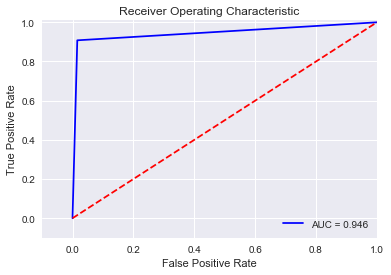

In [29]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.91      0.16        98

   micro avg       0.98      0.98      0.98     56962
   macro avg       0.55      0.95      0.58     56962
weighted avg       1.00      0.98      0.99     56962



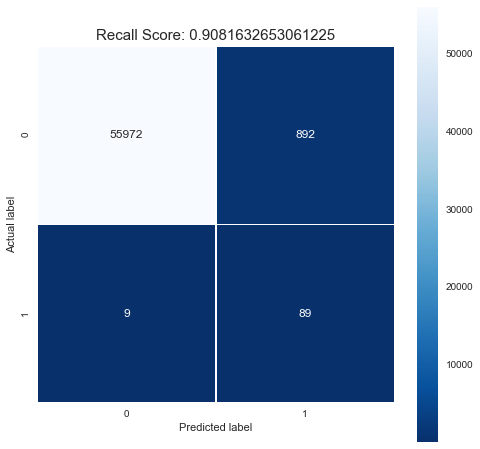

In [30]:
plot_confusion_matrix(y_test,y_pred)

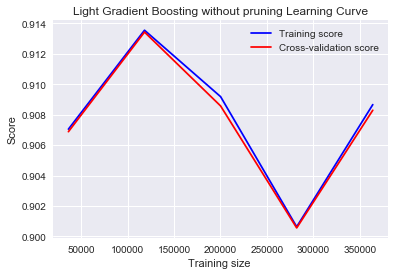

In [31]:
plot_learning_curve(dtree,'Light Gradient Boosting without pruning Learning Curve')

In [33]:
#To use best parameters, RandomisedSearchCV is used with 5 fold cross validation
#Setting all parameters
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
fit_params = {"early_stopping_rounds" : 50, 
             "eval_metric" : 'binary', 
             "eval_set" : [(x_test,y_test)],
             'eval_names': ['valid'],
             'verbose': 0,
             'categorical_feature': 'auto'}

param_test = {'learning_rate' : [0.01, 0.02, 0.03, 0.04, 0.05, 0.08, 0.1, 0.2, 0.3, 0.4],
              'n_estimators' : [100, 200, 300, 400, 500, 600, 800, 1000, 1500, 2000, 3000, 5000],
              'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'max_depth': [-1, 1, 2, 3, 4, 5, 6, 7],
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}

In [37]:
n_iter =2 
#intialize lgbm and lunch the search
lgbm_clf = lgb.LGBMClassifier(random_state=42, n_jobs=4)
grid_search = RandomizedSearchCV(
    estimator=lgbm_clf, param_distributions=param_test, 
    n_iter=n_iter,
    scoring='accuracy',
    cv=5,
    refit=True,
    random_state=42,
    verbose=True)

grid_search.fit(x_train_bal,y_train_bal, **fit_params)
print('Best score reached: {} with params: {} '.format(grid_search.best_score_, grid_search.best_params_))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.7min finished


Best score reached: 0.999402069017063 with params: {'colsample_bytree': 0.6247240713084175, 'learning_rate': 0.2, 'max_depth': 4, 'min_child_samples': 120, 'min_child_weight': 100.0, 'n_estimators': 2000, 'num_leaves': 24, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.5673991135726937} 


In [39]:
lgbm_clf_best=grid_search.best_estimator_
lgbm_clf_best.fit(x_train_bal,y_train_bal)

LGBMClassifier(boosting_type='gbdt', class_weight=None,
        colsample_bytree=0.6247240713084175, importance_type='split',
        learning_rate=0.2, max_depth=4, min_child_samples=120,
        min_child_weight=100.0, min_split_gain=0.0, n_estimators=2000,
        n_jobs=4, num_leaves=24, objective=None, random_state=42,
        reg_alpha=10, reg_lambda=1, silent=True,
        subsample=0.5673991135726937, subsample_for_bin=200000,
        subsample_freq=0)

In [40]:
y_pred=lgbm_clf_best.predict(x_test)

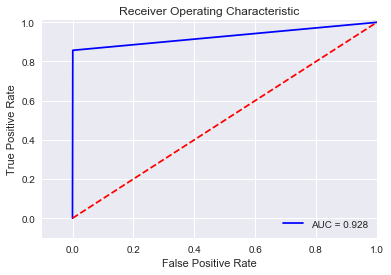

In [41]:
roc_auc(y_test,y_pred)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.86      0.71        98

   micro avg       1.00      1.00      1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



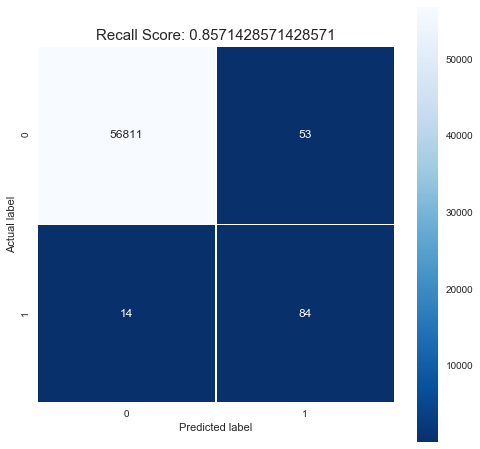

In [42]:
plot_confusion_matrix(y_test,y_pred)